Certainly, the differences in feature selection methods you've experienced is a clear example of why it's important to approach feature selection from multiple angles, especially when the dataset has many features. Different methods might prioritize different features based on their algorithms, and sometimes combining insights from multiple methods can be useful.

Here are some other techniques you can use to determine feature importance:

1. **Correlation Coefficient**: For regression problems, you can compute the correlation between each feature and the target variable. Features with higher correlation might be deemed more important.
2. **Permutation Importance**: After a model (e.g., Random Forest) has been fit, the importance of each feature can be determined by measuring the increase in the model's prediction error after permuting the feature. A feature is considered "important" if shuffling its values increases the model error, because in this case the model relied on the feature for the prediction.
3. **LASSO Regression**: LASSO adds regularization to the regression model, which can force some feature coefficients to be exactly zero. This can be interpreted as the feature being "excluded" from the model.
4. **SHAP Values**: SHAP (SHapley Additive exPlanations) is a method to explain individual predictions. SHAP values interpret the impact of having a certain value for a given feature in comparison to the prediction we'd make if that feature took some baseline value.

Let's implement **Permutation Importance** and **LASSO Regression** to understand feature importance:

In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv("C:/Maize_Chainat_C/45Datapoint_Master/ML_analysis/7Oct_270Dataset/5VI_CD_CV_16ENV_270_01.csv")

# Split the dataset
X = data.drop(columns=["Seed"])
y = data['Seed']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a RandomForest model
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train_scaled, y_train)

# Compute Permutation Importance
perm_importance = permutation_importance(rf, X_test_scaled, y_test, n_repeats=30, random_state=42)
sorted_idx = perm_importance.importances_mean.argsort()

# Print the features based on their permutation importance
print("Features based on Permutation Importance:")
for i in sorted_idx[::-1]:
    print(f"{X.columns[i]}: {perm_importance.importances_mean[i]:.4f}")

# Train a Lasso model and get the coefficients
lasso = Lasso(alpha=0.01)  # You might need to adjust the alpha value based on your data
lasso.fit(X_train_scaled, y_train)
lasso_importance = lasso.coef_

# Print the features based on their LASSO coefficients
print("\nFeatures based on LASSO Regression:")
for i, coef in enumerate(lasso_importance):
    print(f"{X.columns[i]}: {coef:.4f}")


Features based on Permutation Importance:
NDRE_CD: 0.3931
Cire_CD: 0.3744
Cigr_CD: 0.0363
EVI2_CD: 0.0176
NDVI_CD: 0.0112
SoilHumi: 0.0013
Cigr_CV: 0.0012
pH: 0.0006
Wind speed: 0.0004
P: 0.0004
Evapotranspiration: 0.0003
SoilTemp: 0.0003
K: 0.0001
Cire_CV: 0.0000
Daily rain: 0.0000
Rain rate: 0.0000
N: -0.0001
Water feed Per Area (m3/dunam): -0.0006
Uv radiation: -0.0007
EC: -0.0010
Maize_high: -0.0019
EVI2_CV: -0.0019
NDVI_CV: -0.0025
NDRE_CV: -0.0039
Humidity: -0.0040
Temperature: -0.0088

Features based on LASSO Regression:
Cigr_CD: -0.0000
Cire_CD: 0.3444
EVI2_CD: 0.0000
NDRE_CD: 2.3763
NDVI_CD: 0.0000
Cigr_CV: -0.1510
Cire_CV: -0.0000
EVI2_CV: -0.0000
NDRE_CV: -0.0000
NDVI_CV: -0.0000
Maize_high: -0.0000
N: 0.0000
P: -0.0000
K: 0.0000
pH: 0.0102
SoilTemp: -0.0825
SoilHumi: -0.1643
EC: 0.0344
Water feed Per Area (m3/dunam): -0.0000
Uv radiation: -0.0239
Evapotranspiration: 0.1105
Daily rain: 0.0000
Rain rate: 0.0000
Humidity: 0.0378
Wind speed: -0.0997
Temperature: -0.0000


# 1. Feature Importance with RandomForest:
# 2. Train Model with Selected Features:

In [33]:
#RFE with Cross-Validation for feature selection
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import HuberRegressor, RANSACRegressor, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFECV
from sklearn.svm import SVR

# Load the dataset
data = pd.read_csv("C:/Maize_Chainat_C/45Datapoint_Master/ML_analysis/7Oct_270Dataset/5VI_CD_CV_16ENV_270_01.csv")

# Feature and target selection
X = data.drop(columns=["Seed"])
y = data['Seed']

# Splitting the data: 70% training, 20% testing, 10% validation
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=2/3, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Feature Selection using RFE with Cross-Validation
selector = RFECV(estimator=SVR(kernel="linear"), step=1, cv=5)  # Using SVR with linear kernel for RFE
selector = selector.fit(X_train_scaled, y_train)
selected_features_rfe = X_train.columns[selector.support_].tolist()

# Print the selected features from RFE
print("Selected Features based on RFE with Cross-Validation:")
print(selected_features_rfe)

# Training with selected features from RFE
X_train_selected = X_train[selected_features_rfe]
X_test_selected = X_test[selected_features_rfe]
X_train_selected_scaled = scaler.fit_transform(X_train_selected)
X_test_selected_scaled = scaler.transform(X_test_selected)

# Model Definition
models = [
    ("Huber", HuberRegressor(max_iter=10000)),
    ("M-estimators", RANSACRegressor(random_state=42)),
    ("Ridge Regression", Ridge())
]

# Model Evaluation
results = []

for name, model in models:
    pipeline = make_pipeline(StandardScaler(), model)
    pipeline.fit(X_train_selected_scaled, y_train)
    predictions = pipeline.predict(X_test_selected_scaled)
    
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    rmse = mean_squared_error(y_test, predictions, squared=False)
    r2 = r2_score(y_test, predictions)
    
    results.append([name, mae, mse, rmse, r2])

results_df = pd.DataFrame(results, columns=["Model", "MAE", "MSE", "RMSE", "R2"])
print(results_df)


Selected Features based on RFE with Cross-Validation:
['NDRE_CD']
              Model       MAE       MSE      RMSE        R2
0             Huber  0.278752  0.516527  0.718698  0.926315
1      M-estimators  0.297876  0.526503  0.725606  0.924891
2  Ridge Regression  0.382276  0.579601  0.761315  0.917317


In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import HuberRegressor, RANSACRegressor, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone

# Load the dataset
data = pd.read_csv("C:/Maize_Chainat_C/45Datapoint_Master/ML_analysis/7Oct_270Dataset/5VI_CD_CV_16ENV_270_01.csv")

# Feature and target selection
X = data.drop(columns=["Seed"])
y = data['Seed']

# Splitting the data: 70% training, 20% testing, 10% validation
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=2/3, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Feature Importance using RandomForest
estimator = RandomForestRegressor(random_state=42)
estimator.fit(X_train_scaled, y_train)
feature_importances = estimator.feature_importances_
features_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})
features_df_sorted = features_df.sort_values(by='Importance', ascending=False)
top_features_rf = features_df_sorted['Feature'].head(10).tolist()  # Taking top 10 important features

# Print the selected features
print("Selected Features based on RandomForest Importance:")
print(top_features_rf)

# Training with selected features
X_train_selected = X_train[top_features_rf]
X_test_selected = X_test[top_features_rf]
X_train_selected_scaled = scaler.fit_transform(X_train_selected)
X_test_selected_scaled = scaler.transform(X_test_selected)

# Model Definition
models = [
    ("Huber", HuberRegressor(max_iter=10000)),
    ("M-estimators", RANSACRegressor(random_state=42)),
    ("Ridge Regression", Ridge())
]

# Model Evaluation
results = []

for name, model in models:
    pipeline = make_pipeline(StandardScaler(), model)
    pipeline.fit(X_train_selected_scaled, y_train)
    predictions = pipeline.predict(X_test_selected_scaled)
    
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    rmse = mean_squared_error(y_test, predictions, squared=False)
    r2 = r2_score(y_test, predictions)
    
    results.append([name, mae, mse, rmse, r2])

results_df = pd.DataFrame(results, columns=["Model", "MAE", "MSE", "RMSE", "R2"])
print(results_df)


Selected Features based on RandomForest Importance:
['Cire_CD', 'NDRE_CD', 'Cigr_CD', 'EVI2_CD', 'NDVI_CD', 'Cire_CV', 'Cigr_CV', 'NDRE_CV', 'Maize_high', 'Temperature']
              Model       MAE       MSE      RMSE        R2
0             Huber  0.279090  0.516789  0.718880  0.926277
1      M-estimators  0.318609  0.543659  0.737333  0.922444
2  Ridge Regression  0.392099  0.577214  0.759746  0.917657


In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, HuberRegressor, RANSACRegressor

# Load the dataset
data = pd.read_csv("C:/Maize_Chainat_C/45Datapoint_Master/ML_analysis/7Oct_270Dataset/5VI_CD_CV_16ENV_270_01.csv")

# Selecting features
X = data[['Cigr_CD','Cire_CD', 'EVI2_CD', 'NDRE_CD', 'NDVI_CD','Cire_CV', 'NDVI_CV', 'Maize_high', 'Humidity', 'Temperature']]
y = data['Seed']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Models to use for ensemble
models = {
    "Huber": HuberRegressor(max_iter=10000),
    "M-estimators": RANSACRegressor(random_state=42),
    "Ridge Regression": Ridge()
}

# Train the models and get predictions
predictions = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    predictions[name] = model.predict(X_test_scaled)

# Average the predictions
avg_predictions = pd.DataFrame(predictions).mean(axis=1).values

# Evaluate
r2_avg = r2_score(y_test, avg_predictions)
print("R^2 Score with Averaging:", r2_avg)


R^2 Score with Averaging: 0.8974922259838393


In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, HuberRegressor, RANSACRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.metrics import r2_score

# Load the dataset
data = pd.read_csv("C:/Maize_Chainat_C/45Datapoint_Master/ML_analysis/7Oct_270Dataset/5VI_CD_CV_16ENV_270_01.csv")

# Selecting features
X = data[['Cigr_CD','Cire_CD', 'EVI2_CD', 'NDRE_CD', 'NDVI_CD','Cire_CV', 'NDVI_CV', 'Maize_high', 'Humidity', 'Temperature']]
y = data['Seed']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Base models
base_models = [
    ("Huber", HuberRegressor(max_iter=10000)),
    ("M-estimators", RANSACRegressor(random_state=42)),
    ("Ridge Regression", Ridge())
]

# Stacking ensemble
stacked_model = StackingRegressor(estimators=base_models, final_estimator=HuberRegressor(max_iter=10000))

# Fit and predict
stacked_model.fit(X_train_scaled, y_train)
predictions = stacked_model.predict(X_test_scaled)

# Evaluate
r2_stacked = r2_score(y_test, predictions)
print("R^2 Score with Stacking:", r2_stacked)


R^2 Score with Stacking: 0.8986243811527685


# Hyper Parameter Huber Regression

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
import statsmodels.api as sm
from statsmodels.tools import add_constant
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv("C:/Maize_Chainat_C/45Datapoint_Master/ML_analysis/7Oct_270Dataset/5VI_CD_CV_16ENV_270_01.csv")

# Selecting features
X = data[['Cigr_CD','Cire_CD', 'EVI2_CD', 'NDRE_CD', 'NDVI_CD','Cire_CV', 'NDVI_CV', 'Maize_high', 'Humidity', 'Temperature']]
y = data['Seed']

# Splitting the data: 70% training, 20% testing, 10% validation
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=2/3, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# The 'add_constant' function adds a constant column for the intercept
X_train_const = add_constant(X_train_scaled)
X_test_const = add_constant(X_test_scaled)

# Fitting the model
model = sm.RLM(y_train, X_train_const, M=sm.robust.norms.HuberT())
results = model.fit()

# Predictions
y_pred = results.predict(X_test_const)

# Calculate R^2 score
r2 = r2_score(y_test, y_pred)

print("R^2 Score:", r2)


R^2 Score: 0.9262833202536964


In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import HuberRegressor

# Load the dataset
data = pd.read_csv("C:/Maize_Chainat_C/45Datapoint_Master/ML_analysis/7Oct_270Dataset/5VI_CD_CV_16ENV_270_01.csv")

# Selecting features
X = data[['Cigr_CD','Cire_CD', 'EVI2_CD', 'NDRE_CD', 'NDVI_CD','Cire_CV', 'NDVI_CV', 'Maize_high', 'Humidity', 'Temperature']]
y = data['Seed']

# Splitting the data: 70% training, 20% testing, 10% validation
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=2/3, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Creating a pipeline with HuberRegressor and StandardScaler
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('huber', HuberRegressor())
])

# Defining the parameter grid for HuberRegressor
param_grid = {
    # 'huber__epsilon': [1.0, 1.1, 1.2, 1.3, 1.4, 1.5],
    # 'huber__max_iter': [100, 500, 1000, 5000],
    #'huber__alpha': [0.0001, 0.001, 0.01, 0.1, 1]
    'huber__epsilon': [1.0],
    'huber__max_iter': [1000],
    'huber__alpha': [0.1]
}

# Using GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(pipeline, param_grid, cv=5, verbose=2, n_jobs=-1)

grid_search.fit(X_train_scaled, y_train)

# Printing best parameters from the grid search
print("Best parameters found: ", grid_search.best_params_)

# Using the best estimator to make predictions
best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test_scaled)

# Evaluating the model
r2 = r2_score(y_test, predictions)
print(f"R^2 Score with best model: {r2}")


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameters found:  {'huber__alpha': 0.1, 'huber__epsilon': 1.0, 'huber__max_iter': 1000}
R^2 Score with best model: 0.9263125124508116


Test All Feature and Data

In [42]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, HuberRegressor, PassiveAggressiveRegressor, RANSACRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from catboost import CatBoostRegressor

# Load the dataset
data = pd.read_csv("C:/Maize_Chainat_C/45Datapoint_Master/ML_analysis/7Oct_270Dataset/5VI_CD_CV_16ENV_270_01.csv")

X = data.drop(columns=["Seed"])

# Selecting features VI_6Env
#X = data[['Cire_CV', 'Temperature', 'Wind speed', 'SoilHumi', 'K', 'Evapotranspiration', 'P']]
#"Top Features selected by RFE"
# X = data [['Cigr_CD','Cire_CD', 'EVI2_CD', 'NDRE_CD', 'NDVI_CD','Cire_CV', 'NDVI_CV', 'Maize_high', 'Humidity', 'Temperature' ]]
# X = data [['Cire_CV', 
#             'Maize_high', 'Humidity', 'Temperature' ]]
# X = data[['NDRE_CD','Cire_CD']]
y = data['Seed']

# Splitting the data: 70% training, 20% testing, 10% validation
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=2/3, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Models Definition
models = [
    ("CatBoost", CatBoostRegressor(verbose=0, random_state=42)),
    ("Decision Tree", DecisionTreeRegressor(random_state=42)),
    ("ElasticNet", ElasticNet()),
    ("Gradient Boosting", GradientBoostingRegressor(random_state=42)),
    ("Huber", HuberRegressor(max_iter=10000)),
    ("KNN", KNeighborsRegressor()),
    ("Lasso Regression", Lasso()),
    ("Linear Regression", LinearRegression()),
    ("M-estimators", RANSACRegressor(random_state=42)),
    ("Passive Aggressive", PassiveAggressiveRegressor(random_state=42)),
    ("Random Forest", RandomForestRegressor(random_state=42)),
    ("Ridge Regression", Ridge()),
    ("SVR", SVR()),
    ("XGBoost", XGBRegressor(random_state=42))
]

# Model Evaluation
results = []

for name, model in models:
    # Using a pipeline to ensure that scaling is applied during cross-validation steps as well
    pipeline = make_pipeline(StandardScaler(), model)
    pipeline.fit(X_train_scaled, y_train)
    predictions = pipeline.predict(X_test_scaled)
    
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    rmse = mean_squared_error(y_test, predictions, squared=False)
    r2 = r2_score(y_test, predictions)
    
    results.append([name, mae, mse, rmse, r2])


results_df = pd.DataFrame(results, columns=["Model", "MAE", "MSE", "RMSE", "R2"])
print(results_df)
# results_df.to_csv("C:/Maize_Chainat_C/45Datapoint_Master/ML_analysis/7Oct_270Dataset/01performance270_Top10RFE.csv", index=False)


                 Model       MAE       MSE      RMSE        R2
0             CatBoost  0.721332  1.540553  1.241190  0.780232
1        Decision Tree  0.987037  4.735048  2.176017  0.324520
2           ElasticNet  0.878062  1.431269  1.196357  0.795822
3    Gradient Boosting  0.731750  1.653480  1.285877  0.764122
4                Huber  0.279325  0.517176  0.719150  0.926222
5                  KNN  1.067111  1.910847  1.382334  0.727407
6     Lasso Regression  1.092956  2.027035  1.423740  0.710832
7    Linear Regression  0.472390  0.672218  0.819889  0.904104
8         M-estimators  0.344178  0.547097  0.739660  0.921954
9   Passive Aggressive  0.934343  1.666785  1.291040  0.762224
10       Random Forest  0.597941  1.256146  1.120779  0.820804
11    Ridge Regression  0.456708  0.623057  0.789340  0.911118
12                 SVR  0.727065  1.438192  1.199246  0.794834
13             XGBoost  0.829684  2.203648  1.484469  0.685638


1. Feature Importances from RandomForestRegressor: This chart displays the importance scores of each feature as determined by the RandomForestRegressor. The higher the score, the more important the feature is.
2. Top Features selected by RFE: This chart highlights the top 10 features selected by Recursive Feature Elimination (RFE) using the RandomForestRegressor. The features marked with a "1" are the selected features.

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import make_pipeline
from xgboost import XGBRegressor
from sklearn.metrics import r2_score

# Load data
data = pd.read_csv("C:/Maize_Chainat_C/45Datapoint_Master/ML_analysis/7Oct_270Dataset/5VI_CD_CV_16ENV_270_01.csv")

# Preprocessing
X = data.drop(columns=["Seed"])
#"Top Features selected by RFE"
# X = data [['Cigr_CD','Cire_CD', 'EVI2_CD', 'NDRE_CD', 'NDVI_CD','Cire_CV', 'NDVI_CV', 'Maize_high', 'Humidity', 'Temperature' ]]
# X = data [['Cire_CV', 
#             'Maize_high', 'Humidity', 'Temperature' ]]

y = data["Seed"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
pipeline = make_pipeline(
    StandardScaler(),
    PolynomialFeatures(degree=2),
    XGBRegressor()
)

# Hyperparameter tuning
params = {
    'xgbregressor__n_estimators': [50, 100, 200],
    'xgbregressor__max_depth': [3, 5, 7],
    'xgbregressor__learning_rate': [0.01, 0.05, 0.1]
}
grid = GridSearchCV(pipeline, params, cv=5, scoring="r2")
grid.fit(X_train, y_train)

# Evaluation
predictions = grid.best_estimator_.predict(X_test)
r2 = r2_score(y_test, predictions)
print(f"R^2 Score: {r2}")


R^2 Score: 0.8368894120539551


Achieving an \( R^2 \) value of over 0.92 might require a combination of techniques and iterative experimentation. Here's a more detailed approach you can take:

1. **Feature Engineering**:
    - Try creating more **polynomial features** or **interaction terms** between the features. This can help capture any non-linear relationships in the data.
    - Consider **feature selection techniques** like forward selection, backward elimination, or recursive feature elimination to select the most impactful features.

2. **Advanced Regression Techniques**:
    - **Regularization techniques** like Ridge or Lasso regression can sometimes improve the model by adding a penalty to the magnitude of coefficients, especially in the presence of correlated features.
    - **Kernel Ridge Regression** or **Support Vector Regression (SVR)** with different kernels (like the RBF kernel) can be used to capture non-linear relationships.
  
3. **Tree-Based and Ensemble Techniques**:
    - **Random Forests, Gradient Boosting Machines (GBM), XGBoost, and LightGBM** are powerful models that can capture non-linearities and interactions between features.
    - Hyperparameter tuning for these models is crucial. Parameters like learning rate, depth of the tree, number of trees, and regularization can have a significant impact on performance.
  
4. **Neural Networks**:
    - A simple feedforward neural network can sometimes model complex non-linear relationships. You'd need to normalize the input features and possibly use dropout layers to prevent overfitting.
  
5. **Data Augmentation**:
    - If the dataset is not too large, consider techniques like **SMOTE** or **ADASYN** to synthetically generate more data points. This can sometimes help the model generalize better.

6. **Residual Analysis**:
    - After fitting the model, plot and analyze the residuals (difference between predicted and actual values). This can give insights into whether there's any pattern the model isn't capturing.
  
7. **Cross-Validation**:
    - Instead of a single train-test split, use **K-Fold cross-validation** to get a more robust measure of your model's performance.

Here's a sample script building upon the provided one, focusing on the XGBoost model with hyperparameter tuning:

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from xgboost import XGBRegressor
from sklearn.metrics import r2_score

# Load data
data = pd.read_csv("C:/Maize_Chainat_C/45Datapoint_Master/ML_analysis/7Oct_270Dataset/5VI_CD_CV_16ENV_270_01.csv")

# Use selected features
X = data[['Cigr_CD','Cire_CD', 'EVI2_CD', 'NDRE_CD', 'NDVI_CD','Cire_CV', 'NDVI_CV', 'Maize_high', 'Humidity', 'Temperature']]
y = data["Seed"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model with polynomial features
pipeline = make_pipeline(
    StandardScaler(),
    PolynomialFeatures(degree=2),
    XGBRegressor()
)

# Hyperparameter tuning
params = {
    'xgbregressor__n_estimators': [100, 300, 500],
    'xgbregressor__max_depth': [3, 5, 7],
    'xgbregressor__learning_rate': [0.01, 0.05, 0.1],
    'xgbregressor__reg_alpha': [0, 0.1, 1], # L1 regularization term
    'xgbregressor__reg_lambda': [0.1, 1, 5] # L2 regularization term
}

grid = GridSearchCV(pipeline, params, cv=5, scoring="r2")
grid.fit(X_train, y_train)

# Evaluation
predictions = grid.best_estimator_.predict(X_test)
r2 = r2_score(y_test, predictions)
print(f"R^2 Score: {r2}")


R^2 Score: 0.8476668558814293


In [16]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Define a more restricted hyperparameter grid for RandomForestRegressor
param_dist_restricted = {
    'n_estimators': [10, 50, 100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 30, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize RandomForestRegressor
rf = RandomForestRegressor(random_state=42)

# Initialize RandomizedSearchCV with fewer iterations
random_search_restricted = RandomizedSearchCV(rf, param_distributions=param_dist_restricted, n_iter=50, cv=3, verbose=2, random_state=42, n_jobs=-1)

# Fit to the data
random_search_restricted.fit(X_train, y_train)

# Get the best parameters
best_params_restricted = random_search_restricted.best_params_

# Train the model using the best parameters
best_rf_restricted = RandomForestRegressor(**best_params_restricted, random_state=42)
best_rf_restricted.fit(X_train, y_train)

# Predict on the test set
rf_preds_restricted = best_rf_restricted.predict(X_test)

# Evaluate the performance
rf_r2_restricted = r2_score(y_test, rf_preds_restricted)

print(best_params_restricted)
print("R^2 Score:", rf_r2_restricted)


Fitting 3 folds for each of 50 candidates, totalling 150 fits
{'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': None, 'bootstrap': True}
R^2 Score: 0.895080573047996


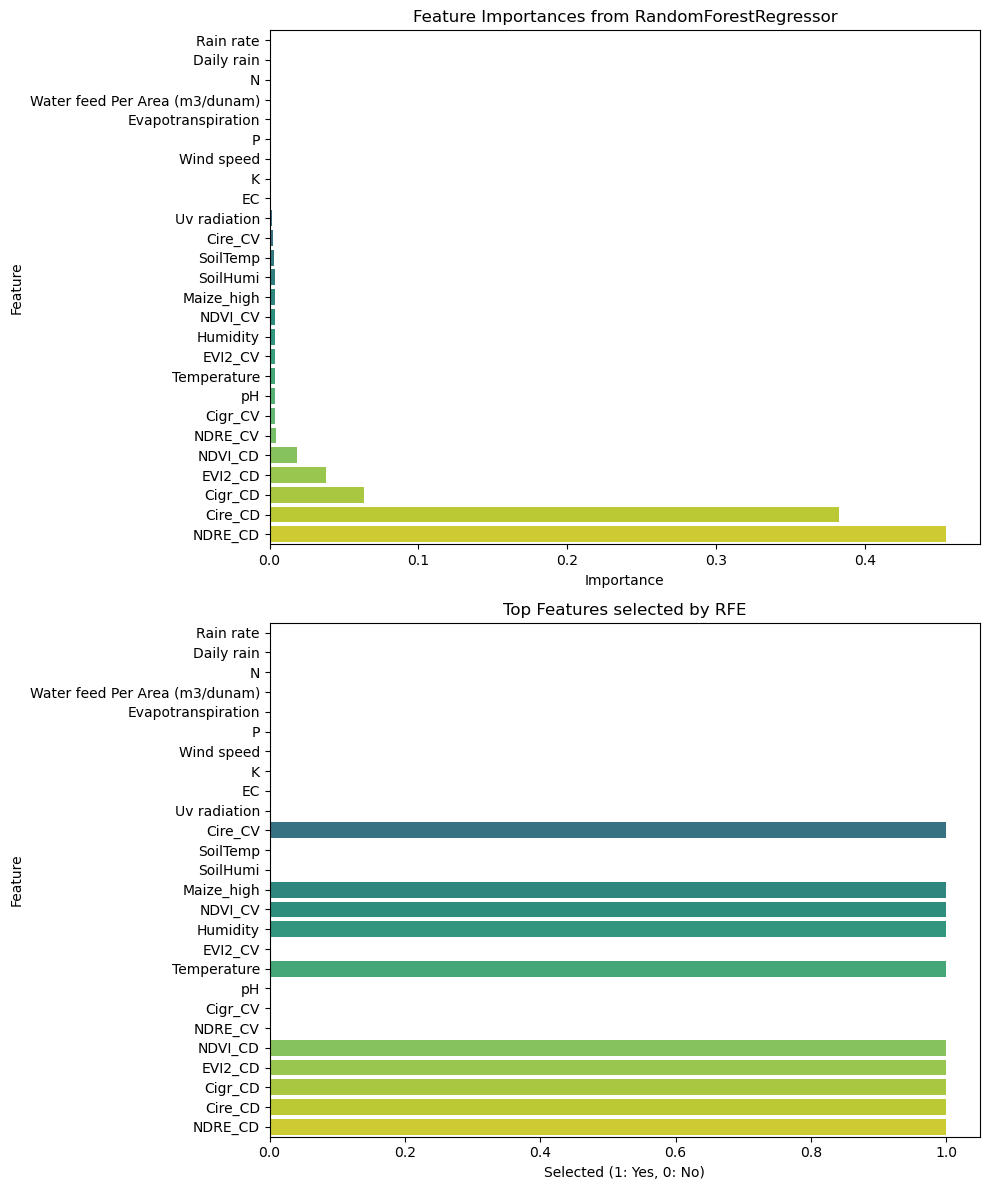

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

# Load the dataset from the provided path
data_new = pd.read_csv("C:/Maize_Chainat_C/45Datapoint_Master/ML_analysis/7Oct_270Dataset/5VI_CD_CV_16ENV_270_01.csv")

X_new = data_new.drop(columns=["Seed"])
y_new = data_new['Seed']

# Using RandomForestRegressor for RFE
model = RandomForestRegressor(random_state=42)
rfe = RFE(estimator=model, n_features_to_select=10)  # Selecting top 10 features
fit = rfe.fit(X_new, y_new)
selected_features_rfe = X_new.columns[fit.support_].tolist()

# Using RandomForestRegressor to get feature importances directly
model.fit(X_new, y_new)
feature_importances = model.feature_importances_
features_df = pd.DataFrame({
    'Feature': X_new.columns,
    'Importance': feature_importances,
    'Selected by RFE': [1 if feature in selected_features_rfe else 0 for feature in X_new.columns]
})

# Sorting features based on importance for visualization
features_df_sorted = features_df.sort_values(by='Importance', ascending=True)

# Saving to CSV
features_df_sorted.to_csv("C:/Maize_Chainat_C/45Datapoint_Master/ML_analysis/7Oct_270Dataset/feature_importances.csv", index=False)

# Plotting feature importances
plt.figure(figsize=(10, 12))

plt.subplot(2, 1, 1)
sns.barplot(x='Importance', y='Feature', data=features_df_sorted, palette="viridis")
plt.title("Feature Importances from RandomForestRegressor")
plt.xlabel("Importance")
plt.ylabel("Feature")

# Plotting RFE selected features
plt.subplot(2, 1, 2)
sns.barplot(x=features_df_sorted['Selected by RFE'], y=features_df_sorted['Feature'], palette="viridis")
plt.title("Top Features selected by RFE")
plt.xlabel("Selected (1: Yes, 0: No)")
plt.ylabel("Feature")

plt.tight_layout()
plt.show()


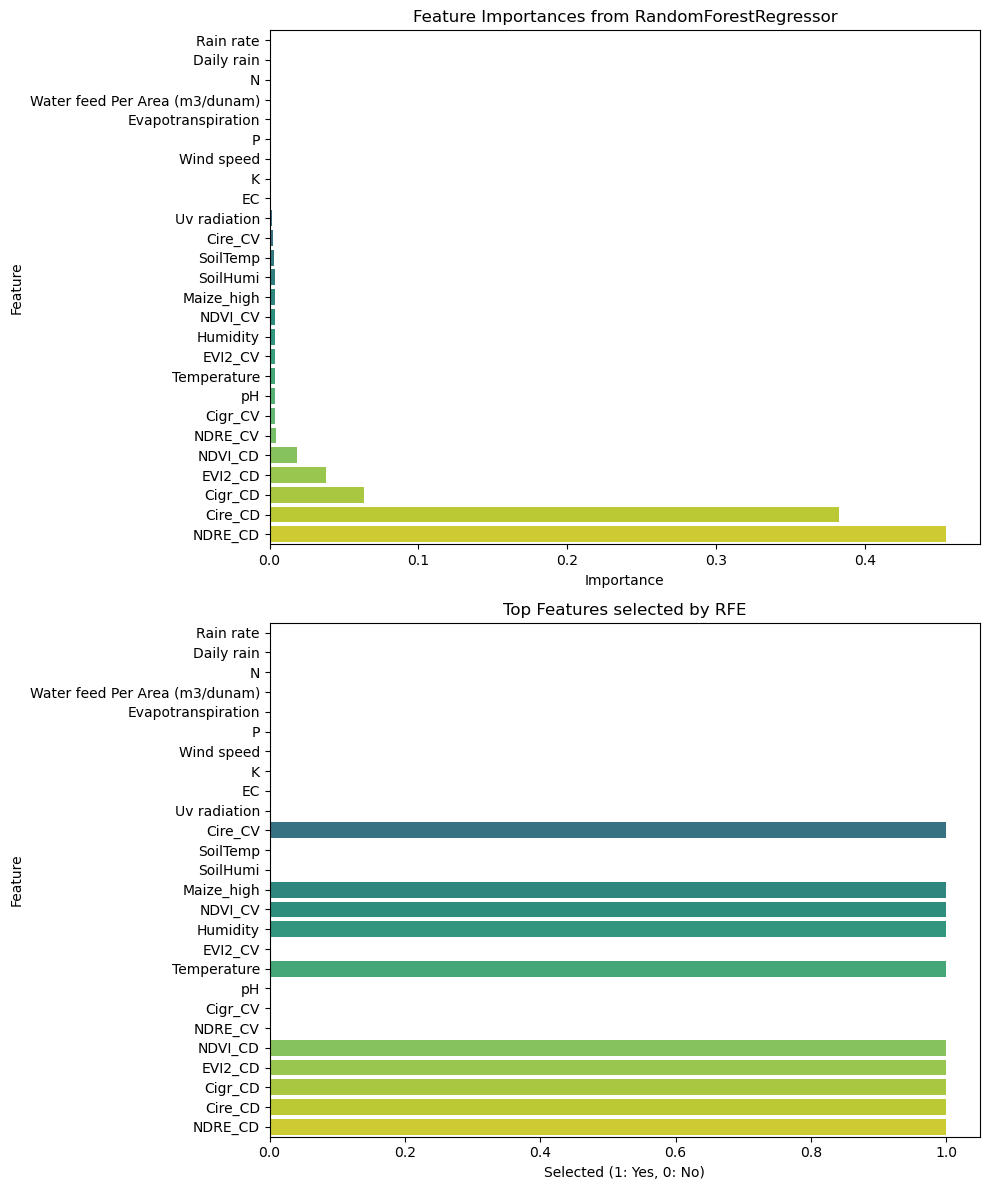

                           Feature  Importance
22                       Rain rate    0.000000
21                      Daily rain    0.000000
11                               N    0.000125
18  Water feed Per Area (m3/dunam)    0.000294
20              Evapotranspiration    0.000569
12                               P    0.000616
24                      Wind speed    0.000853
13                               K    0.001071
17                              EC    0.001191
19                    Uv radiation    0.001313
6                          Cire_CV    0.002054
15                        SoilTemp    0.002975
16                        SoilHumi    0.003290
10                      Maize_high    0.003414
9                          NDVI_CV    0.003440
23                        Humidity    0.003471
7                          EVI2_CV    0.003502
25                     Temperature    0.003554
14                              pH    0.003673
5                          Cigr_CV    0.003713
8            

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

# Load the dataset from the provided path
data_new = pd.read_csv("C:/Maize_Chainat_C/45Datapoint_Master/ML_analysis/7Oct_270Dataset/5VI_CD_CV_16ENV_270_01.csv")

X_new = data_new.drop(columns=["Seed"])
y_new = data_new['Seed']

# Using RandomForestRegressor for RFE
model = RandomForestRegressor(random_state=42)
rfe = RFE(estimator=model, n_features_to_select=10)  # Selecting top 10 features
fit = rfe.fit(X_new, y_new)
selected_features_rfe = X_new.columns[fit.support_].tolist()

# Using RandomForestRegressor to get feature importances directly
model.fit(X_new, y_new)
feature_importances = model.feature_importances_
features_df = pd.DataFrame({
    'Feature': X_new.columns,
    'Importance': feature_importances
})

# Sorting features based on importance for visualization
features_df_sorted = features_df.sort_values(by='Importance', ascending=True)

# Plotting feature importances
plt.figure(figsize=(10, 12))

plt.subplot(2, 1, 1)
sns.barplot(x='Importance', y='Feature', data=features_df_sorted, palette="viridis")
plt.title("Feature Importances from RandomForestRegressor")
plt.xlabel("Importance")
plt.ylabel("Feature")

# Plotting RFE selected features
plt.subplot(2, 1, 2)
sns.barplot(x=features_df_sorted['Feature'].isin(selected_features_rfe), y=features_df_sorted['Feature'], palette="viridis")
plt.title("Top Features selected by RFE")
plt.xlabel("Selected (1: Yes, 0: No)")
plt.ylabel("Feature")

plt.tight_layout()
plt.show()


Thank you for sharing the results. It's evident from the results that the `Huber` regression model achieves the highest \( R^2 \) score of approximately 0.9263, which is impressive and very close to your desired target.

Before we proceed with enhancing the performance further, let's analyze the results:

1. **Huber Regression**: This model is particularly useful when your data might have outliers because it's less sensitive to them compared to other algorithms. The high \( R^2 \) value suggests that it's capturing the underlying patterns of the data well.
2. **M-estimators (RANSAC)**: This is another model that's robust to outliers, and its performance is close to Huber Regression with an \( R^2 \) of 0.9225.
3. **Ridge Regression**: Regularized linear regression model with an \( R^2 \) of 0.9184.
4. **Linear Regression**: Has an \( R^2 \) of 0.9101, which is slightly less than Ridge. It shows that adding regularization (as in Ridge) improves performance a bit.
5. **Passive Aggressive**: This is an online learning algorithm suitable for large-scale learning. It's interesting to see it perform well here with an \( R^2 \) of 0.8557.
6. **ElasticNet and KNN**: Both models have their \( R^2 \) values in the 0.83-0.84 range.

Given the information and the existing results, here are a few strategies to potentially enhance performance:

1. **Hyperparameter Tuning**: As we saw with the RandomForest, hyperparameter tuning can boost the performance. We can apply this strategy, especially for the `Huber` regression model, to see if we can push the \( R^2 \) beyond 0.9263.
2. **Ensemble**: Combining predictions from `Huber`, `M-estimators`, and perhaps `Ridge` might yield a better result. This can be done using techniques like stacking or simple averaging of predictions.
3. **Feature Engineering**: Although the selected features are performing well, creating interactions between them or polynomial features might help in capturing non-linear relationships.
4. **Advanced Algorithms**: Consider using more advanced algorithms like Neural Networks. Given the right architecture and training strategy, deep learning models might be able to capture complex patterns in the data.

